In [183]:
import warnings
warnings.filterwarnings('ignore')

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [185]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [186]:
#Understanding data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BikeSharing/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [187]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [188]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [189]:
#Check null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [190]:
# instant looks index column which will not contribute in analysis, simply drop it
df.drop(['instant'],axis=1,inplace=True)

In [191]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [192]:
#dteday does not looks much impressive as we have smilar column available like yr,mnth,weekday etc. drop it straight away
df.drop(['dteday'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [193]:
#casual & registered (cnt) will make our analysis more complicated, so better remove them and cnt is our target variable 
df.drop(['casual','registered'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [194]:
# lets check another sanity point, is datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [195]:
# Looking into data, we can say season,yr,mnth,holiday,weekday,workingday,weathersit  are categorical variables, so better replace with more meaningful name
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)

In [196]:
df.head(30)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,14.110847,18.181250,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,14.902598,17.686950,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,8.050924,9.470250,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,8.200000,10.606100,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.305237,11.463500,43.6957,12.522300,1600
5,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.378268,11.660450,51.8261,6.000868,1606
6,spring,0,1,0,Friday,1,Mist_cloudy,8.057402,10.441950,49.8696,11.304642,1510
7,spring,0,1,0,Saturday,0,Mist_cloudy,6.765000,8.112700,53.5833,17.875868,959
8,spring,0,1,0,Sunday,0,Clear_Few Clouds,5.671653,5.808750,43.4167,24.250650,822
9,spring,0,1,0,Monday,1,Clear_Few Clouds,6.184153,7.544400,48.2917,14.958889,1321


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [198]:
#Freezing datatypes of numerical columns to appropriate types
df[['temp','atemp','hum','windspeed','cnt']]=df[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


## Perform EDA on the data

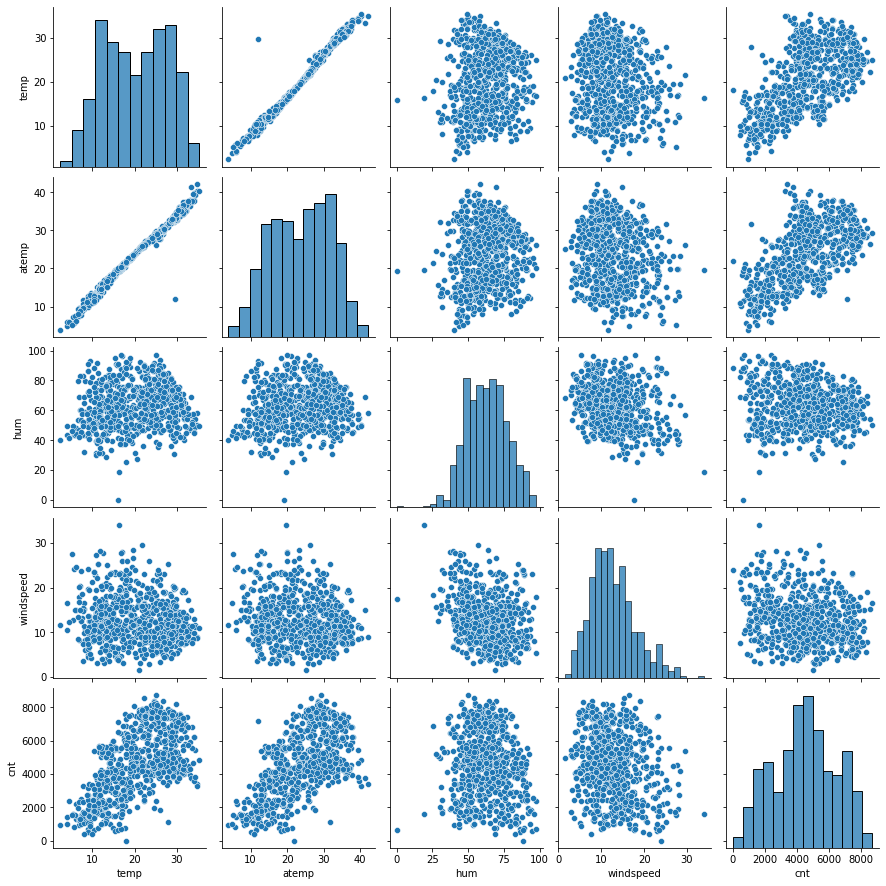

In [199]:
# Checking correlation in 5 numerical variable
sns.pairplot(df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

##temp and atemp are highly correlated in above pair plot

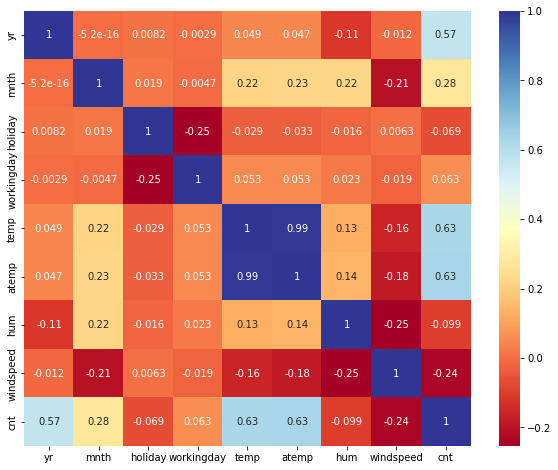

In [200]:
#let check the correlation
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap="RdYlBu")
plt.show()

In [201]:
#correlation between temp and atemp ~1 better drop it

df.drop(['temp'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


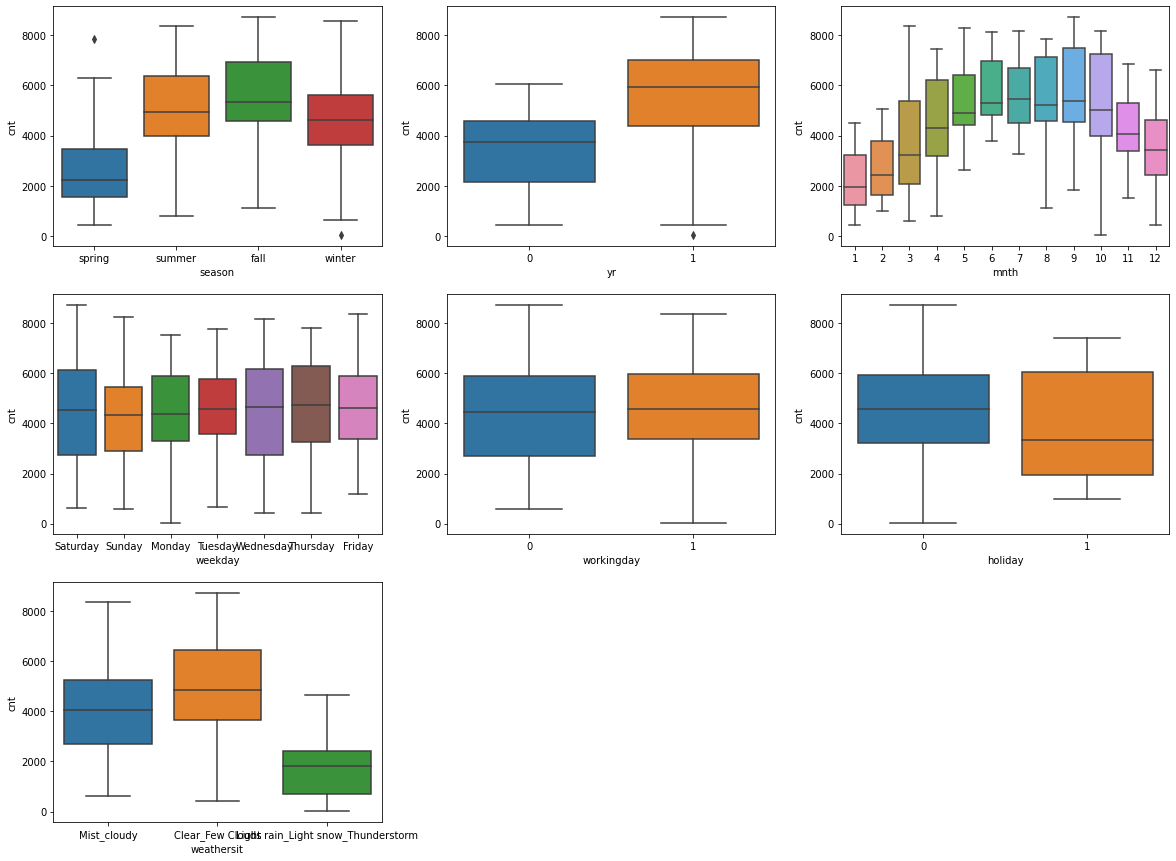

In [202]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df) 
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

## 3. Creating the dummy variable

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 62.9+ KB


In [204]:
# Converting into object
df['mnth']=df['mnth'].astype(object)
df['season']=df['season'].astype(object)
df['weathersit']=df['weathersit'].astype(object)
df['weekday']=df['weekday'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [205]:
df['season']

0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: object

In [206]:
df['weathersit']

0           Mist_cloudy
1           Mist_cloudy
2      Clear_Few Clouds
3      Clear_Few Clouds
4      Clear_Few Clouds
             ...       
725         Mist_cloudy
726         Mist_cloudy
727         Mist_cloudy
728    Clear_Few Clouds
729         Mist_cloudy
Name: weathersit, Length: 730, dtype: object

In [207]:
df['weekday']

0       Saturday
1         Sunday
2         Monday
3        Tuesday
4      Wednesday
         ...    
725     Thursday
726       Friday
727     Saturday
728       Sunday
729       Monday
Name: weekday, Length: 730, dtype: object

In [208]:
df['mnth']

0       1
1       1
2       1
3       1
4       1
       ..
725    12
726    12
727    12
728    12
729    12
Name: mnth, Length: 730, dtype: object

In [209]:
# convert categorical variable into dummy/indicator variables 
SeasonCondition=pd.get_dummies(df['season'],drop_first=True)
WeatherCondition=pd.get_dummies(df['weathersit'],drop_first=True)
DayOfWeek=pd.get_dummies(df['weekday'],drop_first=True)
MonthName=pd.get_dummies(df['mnth'],drop_first=True)

In [210]:
SeasonCondition

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [211]:
WeatherCondition

,Light rain_Light snow_Thunderstorm,Mist_cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [212]:
DayOfWeek

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,0,0
727,0,1,0,0,0,0
728,0,0,1,0,0,0


In [213]:
MonthName

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,0,0,0,0,0,0,0,0,1
726,0,0,0,0,0,0,0,0,0,0,1
727,0,0,0,0,0,0,0,0,0,0,1
728,0,0,0,0,0,0,0,0,0,0,1


In [214]:
df=pd.concat([df,SeasonCondition],axis=1)
df=pd.concat([df,WeatherCondition],axis=1)
df=pd.concat([df,DayOfWeek],axis=1)
df=pd.concat([df,MonthName],axis=1)

In [215]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,3,4,5,6,7,8,9,10,11,12
0,spring,0,1,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,...,0,0,0,0,0,0,0,0,0,0
1,spring,0,1,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,0,0,0
2,spring,0,1,0,Monday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,0
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,0
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [216]:
#Dropping the older variable season, weathersit,weekday,mnth
df.drop(['season'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)

df.drop(['weekday'],axis=1,inplace=True)

df.drop(['mnth'],axis=1,inplace=True)


df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4. Split into training and test data

In [217]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [218]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [219]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [220]:
df_train.columns

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                      'cnt',
                                   'spring',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Monday',
                                 'Saturday',
                                   'Sunday',
                                 'Thursday',
                                  'Tuesday',
                                'Wednesday',
                                          2,
                                          3,
                                          4,
                                          5,
          

In [221]:
# Numberical variable scalling function
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [222]:
NumVar=['atemp','hum','windspeed','cnt']
df_train[NumVar] = scaler.fit_transform(df_train[NumVar])

In [223]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [224]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [225]:
# X and Y creating
y_train = df_train.pop('cnt')
X_train = df_train

In [226]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light rain_Light snow_Thunderstorm,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [227]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## Importing RFE library

In [228]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [229]:
# RFE method for feature selection, and lets take 15 variable

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [230]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 8),
 ('winter', True, 1),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 ('Monday', False, 11),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 13),
 ('Tuesday', False, 12),
 ('Wednesday', False, 14),
 (2, False, 6),
 (3, False, 4),
 (4, False, 3),
 (5, True, 1),
 (6, False, 2),
 (7, False, 7),
 (8, True, 1),
 (9, True, 1),
 (10, False, 5),
 (11, False, 9),
 (12, False, 10)]

In [231]:
column = X_train.columns[rfe.support_]
column

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                 'Saturday',
                                   'Sunday',
                                          5,
                                          8,
                                          9],
      dtype='object')

In [232]:
X_train.columns[~rfe.support_]

Index([   'summer',    'Monday',  'Thursday',   'Tuesday', 'Wednesday',
                 2,           3,           4,           6,           7,
                10,          11,          12],
      dtype='object')

In [233]:
X_train_rfe = X_train[column]

In [234]:
# Model using Statsmodel , import library and add constant

import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [235]:
#OLS best fit
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [236]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          8.06e-186
Time:                        17:28:45   Log-Likelihood:                 503.92
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     495   BIC:                            -914.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2491      0.026      9.727      0.000       0.199       0.299
yr                                     0.2336      0.008     28.414      0.000       0.217       0.250
holiday                               -0.0019      0.022     -0.090      0.928      -0.044       0.041
workingday                             0.0952      0.009     10.096      0.000       0.077       0.114
atemp                                  0.4474      0.031     14.286      0.000       0.386       0.509
hum                                   -0.1549      0.039     -4.002      0.000      -0.231      -0.079
windspeed                             -0.1468      0.026     -5.659      0.000      -0.198      -0.096
spring                                -0.1048      0.015     -6.819      0.000      -0.135      -0.075
winter                                 0.0643      0.013      4.951      0.000       0.039       0.090
Light rain_Light snow_Thunderstorm    -0.2447      0.027     -9.108      0.000      -0.298      -0.192
Mist_cloudy                           -0.0594      0.011     -5.546      0.000      -0.080      -0.038
Saturday                               0.1051      0.012      9.077      0.000       0.082       0.128
Sunday                                 0.0508      0.012      4.163      0.000       0.027       0.075
5                                      0.0528      0.016      3.235      0.001       0.021       0.085
8                                      0.0209      0.016      1.329      0.185      -0.010       0.052
9                                      0.0861      0.016      5.351      0.000       0.054       0.118
==============================================================================
Omnibus:                       70.589   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.199
Skew:                          -0.639   Prob(JB):                     4.16e-48
Kurtosis:                       5.939   Cond. No.                     6.68e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.3e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Identify VIF

In [237]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,40.72
10,Saturday,9.93
11,Sunday,9.67
3,atemp,2.69
6,spring,2.65
1,holiday,2.53
4,hum,1.94
7,winter,1.92
9,Mist_cloudy,1.57
13,8,1.31


In [238]:
X_train_rfe1.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Saturday,Sunday,5,8,9
653,1.0,1,0,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0
576,1.0,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0,0.438975,0.640189,0.255342,1,0,0,1,1,0,0,0,0
728,1.0,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,0,1,0,0,0
482,1.0,1,0,0,0.391735,0.504508,0.188475,0,0,0,1,1,0,0,0,0


In [239]:
# dropping variable "workingday" due to very high vif and re-process the model
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          8.06e-186
Time:                        17:28:45   Log-Likelihood:                 503.92
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     495   BIC:                            -914.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3442      0.031     10.958      0.000       0.282       0.406
yr                                     0.2336      0.008     28.414      0.000       0.217       0.250
holiday                               -0.0971      0.026     -3.724      0.000      -0.148      -0.046
atemp                                  0.4474      0.031     14.286      0.000       0.386       0.509
hum                                   -0.1549      0.039     -4.002      0.000      -0.231      -0.079
windspeed                             -0.1468      0.026     -5.659      0.000      -0.198      -0.096
spring                                -0.1048      0.015     -6.819      0.000      -0.135      -0.075
winter                                 0.0643      0.013      4.951      0.000       0.039       0.090
Light rain_Light snow_Thunderstorm    -0.2447      0.027     -9.108      0.000      -0.298      -0.192
Mist_cloudy                           -0.0594      0.011     -5.546      0.000      -0.080      -0.038
Saturday                               0.0099      0.011      0.866      0.387      -0.013       0.032
Sunday                                -0.0444      0.012     -3.743      0.000      -0.068      -0.021
5                                      0.0528      0.016      3.235      0.001       0.021       0.085
8                                      0.0209      0.016      1.329      0.185      -0.010       0.052
9                                      0.0861      0.016      5.351      0.000       0.054       0.118
==============================================================================
Omnibus:                       70.589   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.199
Skew:                          -0.639   Prob(JB):                     4.16e-48
Kurtosis:                       5.939   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [240]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.78
2,atemp,13.92
4,windspeed,3.99
5,spring,2.71
6,winter,2.32
8,Mist_cloudy,2.26
0,yr,2.05
12,8,1.44
11,5,1.37
13,9,1.27


In [241]:
 # dropping variable "hum" due to very high vif and re-process the model
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.1
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.46e-183
Time:                        17:30:50   Log-Likelihood:                 495.80
No. Observations:                 510   AIC:                            -963.6
Df Residuals:                     496   BIC:                            -904.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2633      0.024     10.787      0.000       0.215       0.311
yr                                     0.2370      0.008     28.542      0.000       0.221       0.253
holiday                               -0.0985      0.026     -3.720      0.000      -0.150      -0.046
atemp                                  0.4201      0.031     13.540      0.000       0.359       0.481
windspeed                             -0.1197      0.025     -4.708      0.000      -0.170      -0.070
spring                                -0.1110      0.016     -7.150      0.000      -0.142      -0.081
winter                                 0.0524      0.013      4.085      0.000       0.027       0.078
Light rain_Light snow_Thunderstorm    -0.2879      0.025    -11.529      0.000      -0.337      -0.239
Mist_cloudy                           -0.0839      0.009     -9.433      0.000      -0.101      -0.066
Saturday                               0.0114      0.012      0.983      0.326      -0.011       0.034
Sunday                                -0.0473      0.012     -3.938      0.000      -0.071      -0.024
5                                      0.0413      0.016      2.528      0.012       0.009       0.073
8                                      0.0177      0.016      1.115      0.265      -0.014       0.049
9                                      0.0792      0.016      4.877      0.000       0.047       0.111
==============================================================================
Omnibus:                       70.907   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.478
Skew:                          -0.669   Prob(JB):                     1.78e-44
Kurtosis:                       5.773   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [242]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.85
3,windspeed,3.94
0,yr,2.05
4,spring,1.73
7,Mist_cloudy,1.54
5,winter,1.52
11,8,1.44
10,5,1.29
12,9,1.25
8,Saturday,1.23


In [243]:
 # dropping variable "atemp" due to very high vif and re-process the model
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     140.3
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          5.97e-151
Time:                        17:32:00   Log-Likelihood:                 415.59
No. Observations:                 510   AIC:                            -805.2
Df Residuals:                     497   BIC:                            -750.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.5446      0.015     36.325      0.000       0.515       0.574
yr                                     0.2474      0.010     25.601      0.000       0.228       0.266
holiday                               -0.1049      0.031     -3.392      0.001      -0.166      -0.044
windspeed                             -0.1728      0.029     -5.884      0.000      -0.230      -0.115
spring                                -0.2518      0.013    -18.688      0.000      -0.278      -0.225
winter                                -0.0310      0.013     -2.358      0.019      -0.057      -0.005
Light rain_Light snow_Thunderstorm    -0.2984      0.029    -10.226      0.000      -0.356      -0.241
Mist_cloudy                           -0.0987      0.010     -9.559      0.000      -0.119      -0.078
Saturday                               0.0081      0.014      0.594      0.553      -0.019       0.035
Sunday                                -0.0461      0.014     -3.282      0.001      -0.074      -0.019
5                                      0.0412      0.019      2.159      0.031       0.004       0.079
8                                      0.0640      0.018      3.521      0.000       0.028       0.100
9                                      0.1091      0.019      5.806      0.000       0.072       0.146
==============================================================================
Omnibus:                       29.683   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.268
Skew:                          -0.300   Prob(JB):                     2.47e-15
Kurtosis:                       4.675   Cond. No.                         8.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [244]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.87
0,yr,1.80
3,spring,1.67
6,Mist_cloudy,1.52
4,winter,1.51
7,Saturday,1.21
8,Sunday,1.19
9,5,1.19
10,8,1.19
11,9,1.12


In [245]:
 # dropping variable "Saturday" due to high pvalue and re-process the model
X_train_rfe=X_train_rfe.drop(['Saturday'],axis=1)
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     153.2
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          5.61e-152
Time:                        17:33:56   Log-Likelihood:                 415.41
No. Observations:                 510   AIC:                            -806.8
Df Residuals:                     498   BIC:                            -756.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.5459      0.015     36.823      0.000       0.517       0.575
yr                                     0.2472      0.010     25.613      0.000       0.228       0.266
holiday                               -0.1065      0.031     -3.459      0.001      -0.167      -0.046
windspeed                             -0.1720      0.029     -5.866      0.000      -0.230      -0.114
spring                                -0.2517      0.013    -18.693      0.000      -0.278      -0.225
winter                                -0.0308      0.013     -2.344      0.019      -0.057      -0.005
Light rain_Light snow_Thunderstorm    -0.2984      0.029    -10.232      0.000      -0.356      -0.241
Mist_cloudy                           -0.0987      0.010     -9.564      0.000      -0.119      -0.078
Sunday                                -0.0476      0.014     -3.450      0.001      -0.075      -0.021
5                                      0.0407      0.019      2.137      0.033       0.003       0.078
8                                      0.0641      0.018      3.528      0.000       0.028       0.100
9                                      0.1091      0.019      5.808      0.000       0.072       0.146
==============================================================================
Omnibus:                       28.981   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.820
Skew:                          -0.277   Prob(JB):                     1.88e-15
Kurtosis:                       4.698   Cond. No.                         8.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [246]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.77
0,yr,1.80
3,spring,1.66
6,Mist_cloudy,1.52
4,winter,1.50
8,5,1.19
9,8,1.18
7,Sunday,1.15
10,9,1.11
5,Light rain_Light snow_Thunderstorm,1.08


In [247]:
#We will find predictive values
y_train_cnt = lm1.predict(X_train_rfe1)

In [248]:
#import the library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [249]:
#Resdual calculation

res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

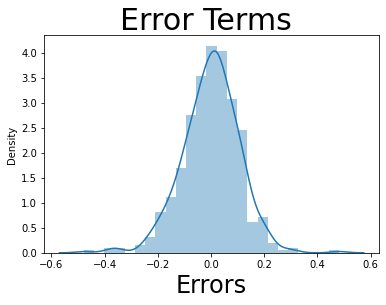

In [250]:
# Assumption of Normality
# Errors term Histogram
fig = plt.figure()
sns.distplot((res), bins = 25)
fig.suptitle('Error Terms', fontsize = 30)  
plt.xlabel('Errors', fontsize = 24)  

In [252]:
X_train_rfe1.shape

(510, 12)

In [253]:
res.shape

(510,)

In [254]:
#Now scalling Test data on model

NumVar=['atemp','hum','windspeed','cnt']
df_test[NumVar] = scaler.fit_transform(df_test[NumVar])

In [255]:
# x and y test sets creation

y_test = df_test.pop('cnt')
X_test = df_test

In [256]:
X_train_new=X_train_rfe1.drop(['const'], axis=1)

In [257]:
# X_test_new dataframe with variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [259]:
# Now making prediction on the newly created data set

y_pred = lm1.predict(X_test_new)

Text(0, 0.5, 'y_pred')

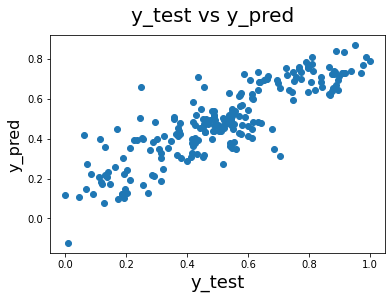

In [260]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)  
plt.xlabel('y_test', fontsize=18)   
plt.ylabel('y_pred', fontsize=16)

In [261]:
# Square root of MSE
np.sqrt(mean_squared_error(y_test, y_pred))

0.12494603920906813

In [262]:
#Calculate the r square for test

r2 = r2_score(y_test, y_pred)
r2

0.7247537293248368

### **R2 of the model is 72.4**

In [263]:
X_train=X_train_new.iloc[:,0].values

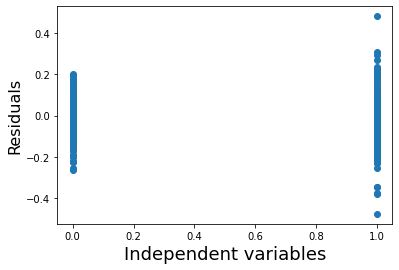

In [264]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_train,res)
fig.suptitle('Independent variables vs Residuals', fontsize=20)  
plt.xlabel('Independent variables', fontsize=18)   
plt.ylabel('Residuals', fontsize=16)  
plt.show()

In [265]:
X_train_new.head()

,yr,holiday,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Sunday,5,8,9
653,1,0,0.300794,0,1,0,0,0,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0
426,1,0,0.255342,1,0,0,1,0,0,0,0
728,1,0,0.663106,1,0,0,0,1,0,0,0
482,1,0,0.188475,0,0,0,1,0,0,0,0


In [266]:
X_train_rfe1.columns

Index([                             'const',
                                       'yr',
                                  'holiday',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Sunday',
                                          5,
                                          8,
                                          9],
      dtype='object')

In [267]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     153.2
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          5.61e-152
Time:                        17:46:09   Log-Likelihood:                 415.41
No. Observations:                 510   AIC:                            -806.8
Df Residuals:                     498   BIC:                            -756.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.5459      0.015     36.823      0.000       0.517       0.575
yr                                     0.2472      0.010     25.613      0.000       0.228       0.266
holiday                               -0.1065      0.031     -3.459      0.001      -0.167      -0.046
windspeed                             -0.1720      0.029     -5.866      0.000      -0.230      -0.114
spring                                -0.2517      0.013    -18.693      0.000      -0.278      -0.225
winter                                -0.0308      0.013     -2.344      0.019      -0.057      -0.005
Light rain_Light snow_Thunderstorm    -0.2984      0.029    -10.232      0.000      -0.356      -0.241
Mist_cloudy                           -0.0987      0.010     -9.564      0.000      -0.119      -0.078
Sunday                                -0.0476      0.014     -3.450      0.001      -0.075      -0.021
5                                      0.0407      0.019      2.137      0.033       0.003       0.078
8                                      0.0641      0.018      3.528      0.000       0.028       0.100
9                                      0.1091      0.019      5.808      0.000       0.072       0.146
==============================================================================
Omnibus:                       28.981   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.820
Skew:                          -0.277   Prob(JB):                     1.88e-15
Kurtosis:                       4.698   Cond. No.                         8.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ***Equation for best fitted line can be drawn as below***
**cnt= 0.247 X yr - 0.106 X holiday - 0.172 X windspeed - 0.252 X spring - 0.031 X winter - 0.298 X Light rain_Light snow_Thunderstorm - 0.099 X Mist_Cloudy - 0.048 * Sunday + 0.407 X 5 +0.641 X 8  + 0.109 X 9**